In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline 

In [3]:
train_values = pd.read_csv('data/train_values.csv', index_col='building_id')
train_labels = pd.read_csv('data/train_labels.csv', index_col='building_id')
# train = train_values.merge(train_labels, left_index=True, right_index=True)
# train.sort_index(inplace=True)
train_labels.sort_index(inplace=True)
train_values.sort_index(inplace=True)

In [4]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0
8,17,409,12182,2,0,13,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,damage_grade
building_id,
4,2
8,3
12,3
16,2
17,2


In [6]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [7]:
categorical_columns = train_values.select_dtypes(include=['object']).columns
categorical_columns

Index(['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], dtype='object')

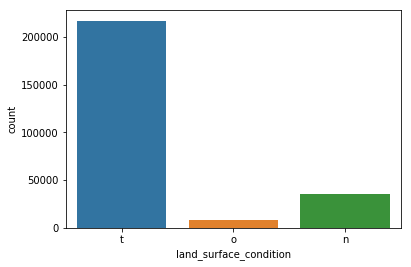

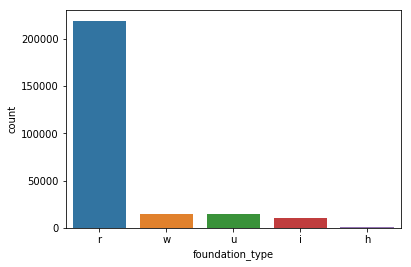

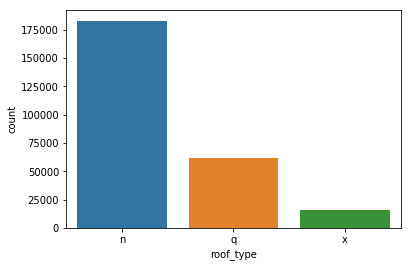

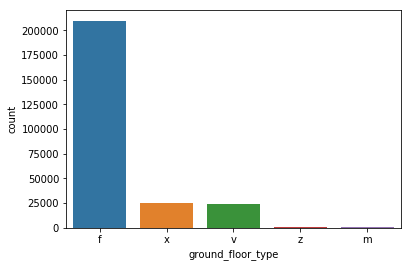

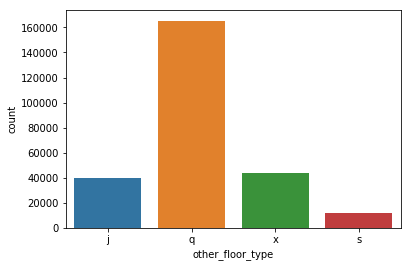

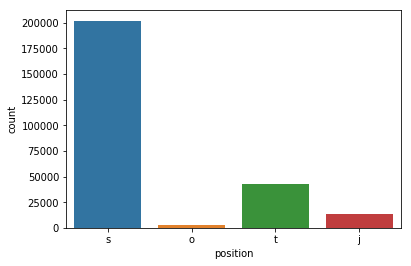

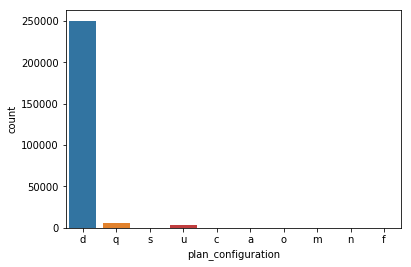

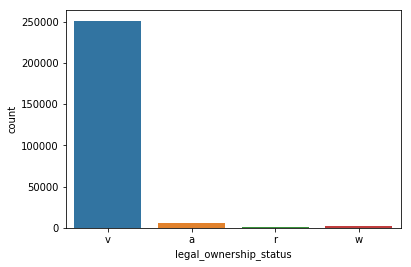

In [8]:
for cal in categorical_columns:
    sns.countplot(x=train_values[cal])
    plt.show()

## Encode

In [9]:
df_enc = pd.get_dummies(train_values )
df_enc.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,17,409,12182,2,0,13,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,17,716,7056,2,5,12,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
16,4,651,105,2,80,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
17,3,1387,3909,5,40,5,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df_enc.sum().sort_values()

plan_configuration_f                              22
has_secondary_use_use_police                      23
has_secondary_use_gov_office                      38
plan_configuration_n                              38
plan_configuration_m                              46
has_secondary_use_health_post                     49
has_secondary_use_school                          94
plan_configuration_o                             159
has_secondary_use_institution                    245
plan_configuration_a                             252
has_secondary_use_industry                       279
plan_configuration_c                             325
plan_configuration_s                             346
ground_floor_type_m                              508
ground_floor_type_z                             1004
has_secondary_use_other                         1334
foundation_type_h                               1448
legal_ownership_status_r                        1473
has_secondary_use_rental                      

## SPLIT train and test

In [11]:
#todo split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_enc, train_labels['damage_grade'], test_size=0.3)

## SMOTE - on trainset

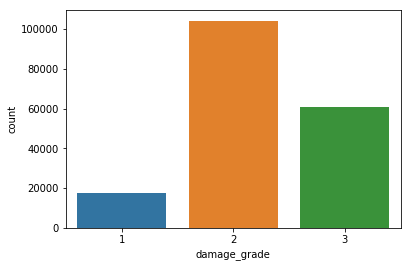

In [12]:
sns.countplot(x=y_train)

In [13]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42, k_neighbors=5)
x_os_train, y_os_train = os.fit_resample(x_train, y_train)

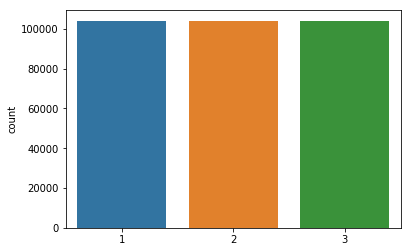

In [14]:
sns.countplot(x=y_os_train)

# Model

In [15]:
import tensorflow.keras as keras
import tensorflow as tf
import tensorflow.keras.utils as keras_utils

from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2

print('tensorflow', tf.__version__)
print('keras', keras.__version__)

tensorflow 1.13.1
keras 2.2.4-tf


In [16]:
print(x_os_train.shape, y_os_train.shape)
print(x_test.shape, y_test.shape)

(312237, 68) (312237,)
(78181, 68) (78181,)


In [17]:
n = 68
model = Sequential()
model.add(BatchNormalization(input_shape=(n,)))
# model.add(Dense(4*n, activation='tanh'))
model.add(Dense(2*n, activation='tanh'))
model.add(Dense(n, activation='tanh'))
# model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 68)                272       
_________________________________________________________________
dense (Dense)                (None, 136)               9384      
_________________________________________________________________
dense_1 (Dense)              (None, 68)                9316      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 207       
Total params: 19,179
Trainable params: 19,043
Non-trainable params: 136
_________________________________________________________________


In [19]:
# df_enc, train_labels['damage_grade']
input_x = x_os_train
input_y = keras_utils.to_categorical(y_os_train-1)
y_val = keras_utils.to_categorical(y_test-1)
history = model.fit(input_x, input_y,  epochs=20, validation_data=(x_test, y_val), batch_size=512)

Train on 312237 samples, validate on 78181 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
312237/312237 [==============================] - 3s 10us/sample - loss: 0.6812 - acc: 0.6625 - val_loss: 0.7786 - val_acc: 0.6137
Epoch 2/20
312237/312237 [==============================] - 1s 4us/sample - loss: 0.6412 - acc: 0.6876 - val_loss: 0.7882 - val_acc: 0.6009
Epoch 3/20
312237/312237 [==============================] - 1s 4us/sample - loss: 0.6215 - acc: 0.7010 - val_loss: 0.7647 - val_acc: 0.6313
Epoch 4/20
312237/312237 [==============================] - 1s 4us/sample - loss: 0.5979 - acc: 0.7173 - val_loss: 0.7490 - val_acc: 0.6415
Epoch 5/20
312237/312237 [==============================] - 1s 4us/sample - loss: 0.5811 - acc: 0.7264 - val_loss: 0.7309 - val_acc: 0.6539
Epoch 6/20
312237/312237 [==============================] - 1s 4us/sample - loss: 0.5711 - acc: 0.7322 - val_loss: 0.7460 - val_acc: 0.6336
Epoch 7/20
312237/312237 [==============================] - 

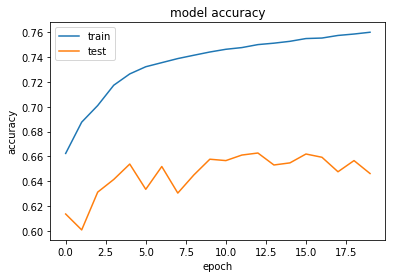

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

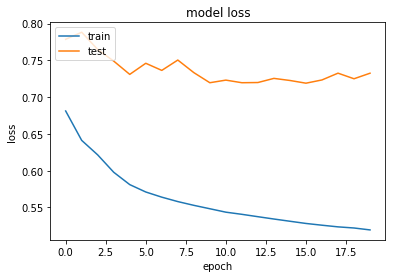

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

In [22]:
test_values = pd.read_csv('data/test_values.csv', index_col='building_id')
test_enc = pd.get_dummies(test_values)
predictions = model.predict_classes(test_enc)
corr_pred = predictions+1

In [23]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=corr_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,3
745817,2
421793,3


In [24]:
my_submission.to_csv('submission-nn-3.csv')

In [25]:
!head submission-nn-3.csv

building_id,damage_grade
300051,3
99355,2
890251,3
745817,2
421793,3
871976,3
691228,2
896100,3
343471,2


In [26]:
# Result 0.68-0.7 ... bad one

In [34]:
!pip install mlflow==1.3.0
from mlflow.keras import save_model
import shutil
model_dir = 'model'
save_model(model, model_dir)
zip_path = shutil.make_archive(model_dir, 'zip', model_dir)
shutil.rmtree(model_dir)